In [13]:
import requests
import json

In [31]:
#PLAYER SEARCHING

API_KEY = '9f68d3dd-bd65-4d1f-bcf8-bfc8d0bc8c71'
BASE_PLAYERS_URL = 'https://api.cricapi.com/v1/players?apikey={}&search={}'
PLAYER_INFO_URL = 'https://api.cricapi.com/v1/players_info?apikey={}&id={}'

def get_players_by_name(player_name):
    try:
        response = requests.get(BASE_PLAYERS_URL.format(API_KEY, player_name))
        response.raise_for_status()
        data = response.json()
        
        if data.get("status") == "success":
            return data['data']
        else:
            print(f"API returned an error: {data}")
            return []
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        return []
    except requests.exceptions.RequestException as err:
        print(f"Other error occurred: {err}")
        return []
    except json.JSONDecodeError:
        print("Error decoding the JSON response.")
        return []

def save_player_info_to_file(player_name, player_info):
    filename = f"{player_name.replace(' ', '_').lower()}_info.json"
    with open(filename, 'w') as file:
        json.dump(player_info, file, indent=4)
    print(f"Player information saved to {filename}")


def get_player_info(player_id):
    try:
        response = requests.get(PLAYER_INFO_URL.format(API_KEY, player_id))
        response.raise_for_status()
        data = response.json()
        
        if data.get("status") == "success":
            return data['data']
        else:
            print(f"API returned an error: {data}")
            return None
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        return None
    except requests.exceptions.RequestException as err:
        print(f"Other error occurred: {err}")
        return None
    except json.JSONDecodeError:
        print("Error decoding the JSON response.")
        return None

def find_player_details(player_name):
    players = get_players_by_name(player_name)

    if len(players) == 0:
        print(f"No player found with the name '{player_name}'.")
    elif len(players) == 1:
        player = players[0]
        player_info = get_player_info(player['id'])
        if player_info:
            save_player_info_to_file(player['name'], player_info)
            print(f"Player details for {player_name}:")
            print(json.dumps(player_info, indent=4))
        else:
            print(f"Failed to fetch details for player with ID {player['id']}.")
    else:
        print(f"Multiple players found with the name '{player_name}'. Please provide a more specific name.")
        for player in players:
            print(f"- {player['name']} ({player['country']})")

# Example usage:
player_name = 'Bhuvneshwar'  # Change to the player name you want to search for
find_player_details(player_name)


Player information saved to bhuvneshwar_kumar_info.json
Player details for Bhuvneshwar:
{
    "id": "3f3ecf51-8411-4046-9477-18c0fe3da6ac",
    "name": "Bhuvneshwar Kumar",
    "dateOfBirth": "1990-02-05T00:00:00",
    "role": "Bowler",
    "battingStyle": "Right Handed Bat",
    "bowlingStyle": "Right-arm fast-medium",
    "placeOfBirth": "Meerut, Uttar Pradesh",
    "country": "India",
    "playerImg": "https://h.cricapi.com/img/players/3f3ecf51-8411-4046-9477-18c0fe3da6ac.jpg",
    "stats": [
        {
            "fn": "batting",
            "matchtype": "test",
            "stat": "m",
            "value": "21"
        },
        {
            "fn": "batting",
            "matchtype": "test",
            "stat": "inn",
            "value": "29"
        },
        {
            "fn": "batting",
            "matchtype": "test",
            "stat": "no",
            "value": "4"
        },
        {
            "fn": "batting",
            "matchtype": "test",
            "stat": "ru

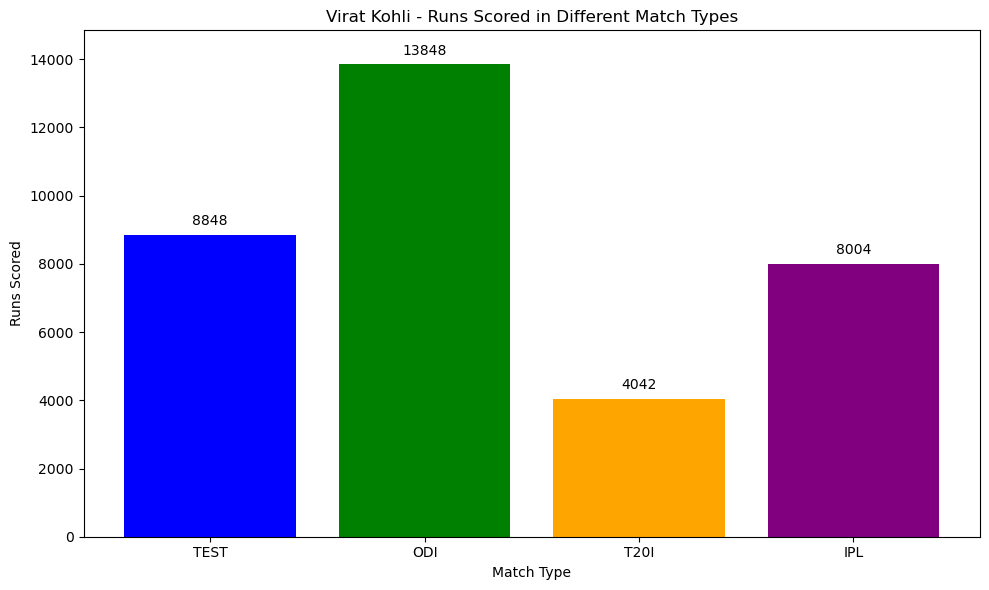

In [37]:
#PLAYER BATTING STATS
import matplotlib.pyplot as plt

# Load player information from the saved JSON file
with open('virat_kohli_info.json', 'r', encoding='utf-8') as f:
    player_info = json.load(f)

# Extracting batting stats from player_info
batting_stats = player_info['stats']
match_types = ['TEST', 'ODI', 'T20I', 'IPL']
runs = []

# Fetching runs data for different match types
for stat in batting_stats:
    if stat['fn'] == 'batting' and stat['stat'] == 'runs' and stat['matchtype'].upper() in match_types:
        runs.append(int(stat['value']))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(match_types, runs, color=['blue', 'green', 'orange', 'purple'])

plt.xlabel('Match Type')
plt.ylabel('Runs Scored')
plt.title(f'{player_info["name"]} - Runs Scored in Different Match Types')

plt.ylim(0, max(runs) + 1000)  # Adjust y-axis limit for better visualization

# Adding exact values on top of each bar with better spacing
for bar, run in zip(bars, runs):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{run}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Avg List: [49.16, 58.68, 49.9, 38.67]
SR List: [55.56, 93.59, 137.91, 131.97]


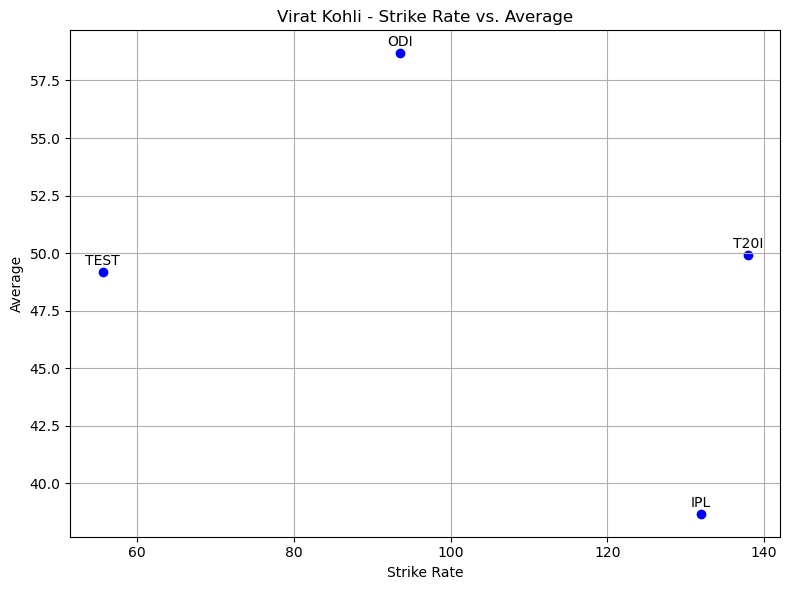

In [20]:
import json
import matplotlib.pyplot as plt

# Load player information from the saved JSON file
with open('virat_kohli_info.json', 'r', encoding='utf-8') as f:
    player_info = json.load(f)

# Extracting batting stats from player_info
batting_stats = player_info['stats']
match_types = ['TEST', 'ODI', 'T20I', 'IPL']
avg = []
sr = []

# Fetching average and strike rate data for different match types
for stat in batting_stats:
    if stat['fn'] == 'batting' and stat['matchtype'].upper() in match_types:
        for key in stat:
            if key == 'stat':
                if stat[key] == 'avg':
                    avg.append(float(stat['value']))
                elif stat[key] == 'sr':
                    sr.append(float(stat['value']))

# Debugging: Print avg and sr lists to check their contents
print("Avg List:", avg)
print("SR List:", sr)

# Plotting the scatter plot if data extraction was successful
if len(avg) == len(sr) and len(avg) > 0:
    plt.figure(figsize=(8, 6))
    plt.scatter(sr, avg, marker='o', color='blue')

    plt.xlabel('Strike Rate')
    plt.ylabel('Average')
    plt.title(f'{player_info["name"]} - Strike Rate vs. Average')

    # Adding match type labels to points for better understanding
    for i, match_type in enumerate(match_types):
        plt.annotate(match_type, (sr[i], avg[i]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Data extraction failed or no data found.")


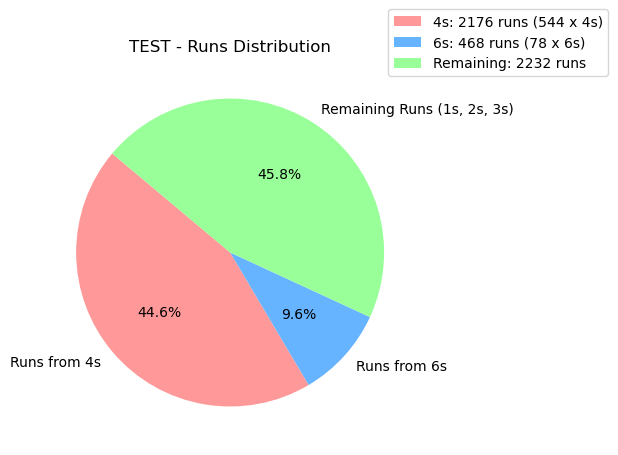

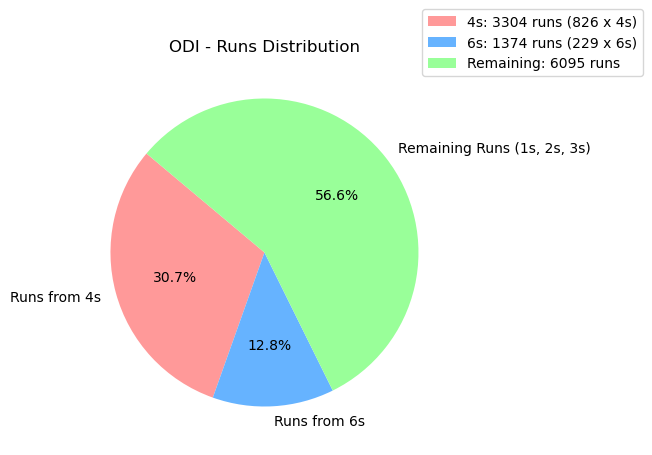

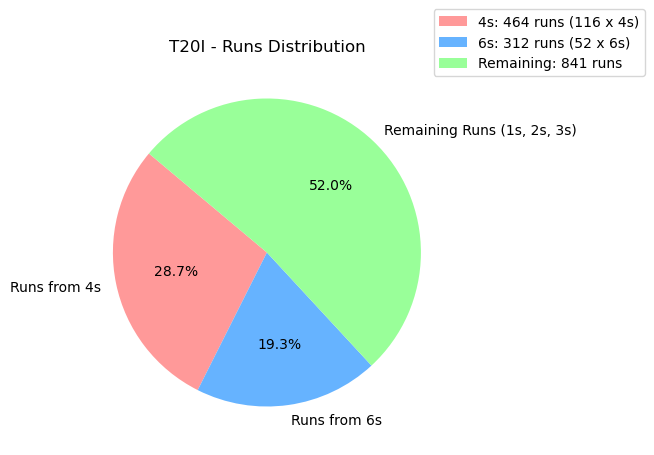

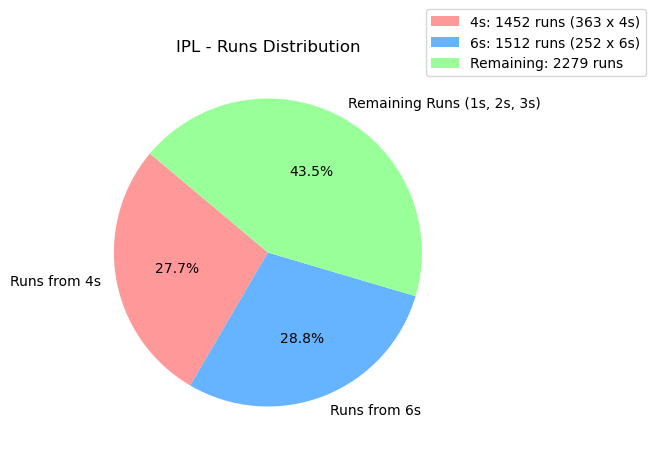

In [18]:
import json
import matplotlib.pyplot as plt

def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def extract_stats(data, matchtype, stat):
    for entry in data['stats']:
        if entry['matchtype'] == matchtype and entry['stat'] == stat:
            return int(entry['value'])
    return 0

def calculate_runs_distribution(data, matchtype):
    total_runs = extract_stats(data, matchtype, 'runs')
    fours = extract_stats(data, matchtype, '4s')
    sixes = extract_stats(data, matchtype, '6s')
    runs_from_fours = 4 * fours
    runs_from_sixes = 6 * sixes
    remaining_runs = total_runs - (runs_from_fours + runs_from_sixes)
    return runs_from_fours, runs_from_sixes, remaining_runs, fours, sixes

def plot_runs_distribution_pie_chart(format_type, runs_from_fours, runs_from_sixes, remaining_runs, fours, sixes):
    labels = ['Runs from 4s', 'Runs from 6s', 'Remaining Runs (1s, 2s, 3s)']
    sizes = [runs_from_fours, runs_from_sixes, remaining_runs]
    colors = ['#ff9999','#66b3ff','#99ff99']
    
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f"{format_type.upper()} - Runs Distribution")
    legend_labels = [f"4s: {runs_from_fours} runs ({fours} x 4s)", f"6s: {runs_from_sixes} runs ({sixes} x 6s)", f"Remaining: {remaining_runs} runs"]
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.15), labels=legend_labels)
    plt.show()

# Main function to load data and plot charts
def main():
    filename = 'ms_dhoni_info.json'
    data = load_data(filename)
    
    formats = ['test', 'odi', 't20i', 'ipl']
    
    for format_type in formats:
        runs_from_fours, runs_from_sixes, remaining_runs, fours, sixes = calculate_runs_distribution(data, format_type)
        plot_runs_distribution_pie_chart(format_type, runs_from_fours, runs_from_sixes, remaining_runs, fours, sixes)

if __name__ == "__main__":
    main()


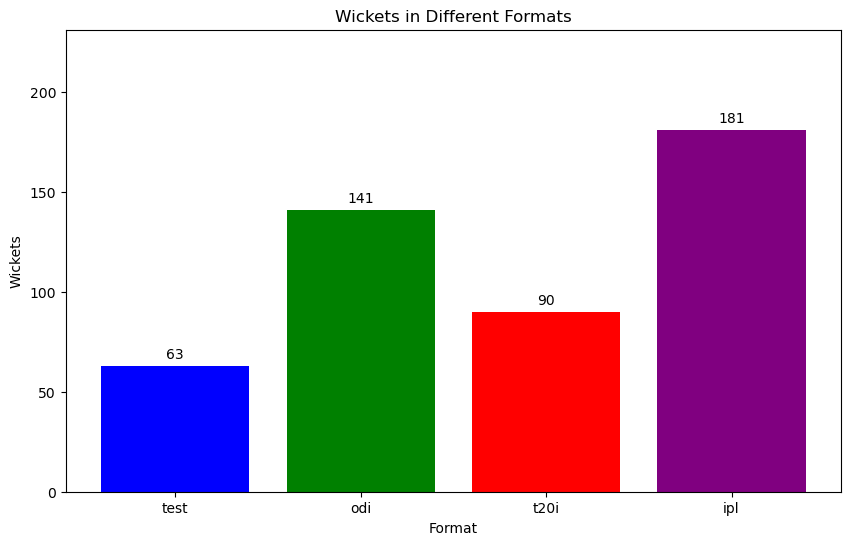

In [52]:
import json
import matplotlib.pyplot as plt

# Load data
with open('bhuvneshwar_kumar_info.json', 'r') as file:
    data = json.load(file)

# Extracting bowling stats
bowling_stats = {}
for stat in data['stats']:
    if stat['fn'] == 'bowling':
        matchtype = stat['matchtype']
        if matchtype not in bowling_stats:
            bowling_stats[matchtype] = {}
        bowling_stats[matchtype][stat['stat']] = int(stat['value']) if stat['value'].isdigit() else stat['value']

# Prepare data for plotting
formats = ['test', 'odi', 't20i', 'ipl']
wickets = [bowling_stats[fmt].get('wkts', 0) for fmt in formats]

# Plotting wickets in different formats
plt.figure(figsize=(10, 6))
bars = plt.bar(formats, wickets, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Format')
plt.ylabel('Wickets')
plt.ylim(0, max(wickets) + 50)
plt.title('Wickets in Different Formats')

# Adding numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, int(yval), va='bottom' ,ha='center')  # va: vertical alignment

plt.show()


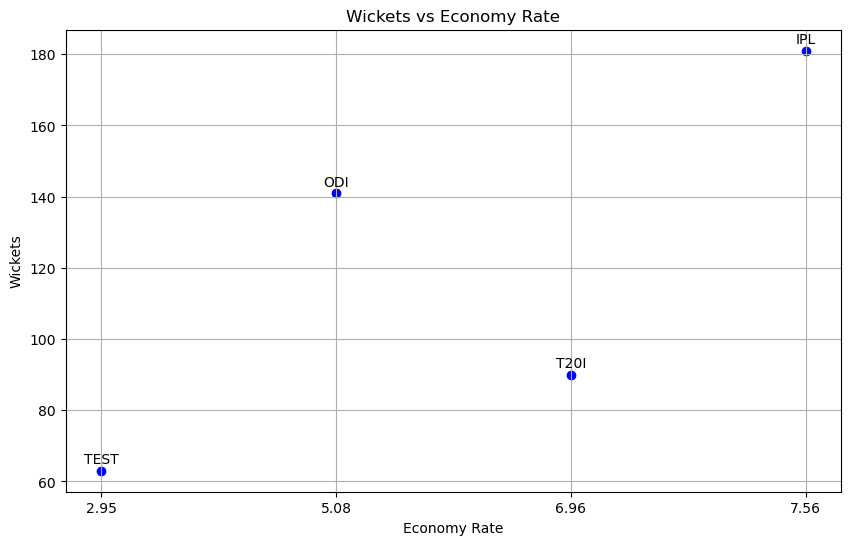

In [71]:
 
formats = ['test', 'odi', 't20i', 'ipl']
wickets = [bowling_stats[fmt].get('wkts', 0) for fmt in formats]
economy_rates = [bowling_stats[fmt].get('econ', 0) for fmt in formats]

# Plotting scatter plot of wickets vs economy
plt.figure(figsize=(10, 6))
plt.scatter(economy_rates, wickets, color='blue')

# Adding labels to the points
for i, fmt in enumerate(formats):
    plt.annotate(fmt.upper(), (economy_rates[i], wickets[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Economy Rate')
plt.ylabel('Wickets')
plt.title('Wickets vs Economy Rate')
plt.grid(True)
plt.show()

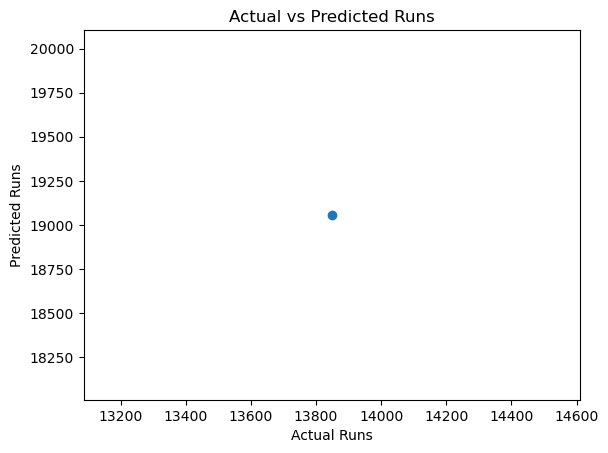

Coefficients: [206.58589512 139.7721519 ]
Intercept: -1336.1555153707022


In [73]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load player data
with open('virat_kohli_info.json', 'r') as f:
    data = json.load(f)

# Extract relevant data into a DataFrame
stats = data['stats']
batting_stats = [stat for stat in stats if stat['fn'] == 'batting']

# Convert to DataFrame
df = pd.DataFrame(batting_stats)

# Filter relevant columns
df_runs = df[df['stat'] == 'runs'][['matchtype', 'value']].rename(columns={'value': 'runs'})
df_100s = df[df['stat'] == '100s'][['matchtype', 'value']].rename(columns={'value': '100s'})
df_50s = df[df['stat'] == '50s'][['matchtype', 'value']].rename(columns={'value': '50s'})

# Merge DataFrames
df_combined = df_runs.merge(df_100s, on='matchtype').merge(df_50s, on='matchtype')

# Convert columns to numeric
df_combined['runs'] = pd.to_numeric(df_combined['runs'])
df_combined['100s'] = pd.to_numeric(df_combined['100s'])
df_combined['50s'] = pd.to_numeric(df_combined['50s'])

# Create features and labels
X = df_combined[['100s', '50s']]
y = df_combined['runs']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()

# Print model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
